In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'],axis = 'columns')
y = df['target']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [22]:
len(X_train)

75

In [23]:
len(X_test)

75

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [31]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [32]:
knn.score(X_test,y_test)

0.9466666666666667

In [33]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[29,  0,  0],
       [ 0, 23,  0],
       [ 0,  4, 19]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

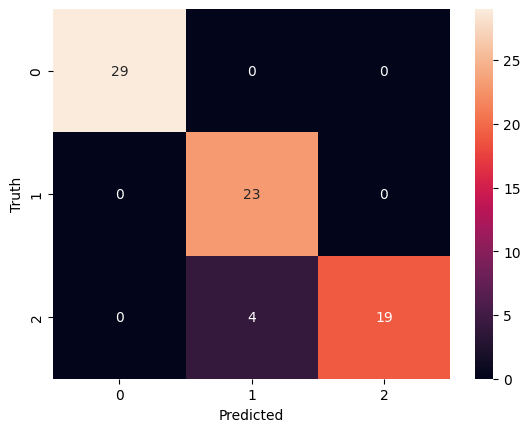

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure()
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.85      1.00      0.92        23
           2       1.00      0.83      0.90        23

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75

